In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 讀取資料
data = pd.read_csv('diet_data_cleaned.csv')

# 假設資料中有一個 'ID' 欄位，需將其移除
# 如果沒有，請忽略此步驟
data_features = data.drop(columns=['ID'])

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# 將標準化後的資料轉換回 DataFrame（可選）
data_scaled_df = pd.DataFrame(data_scaled, columns=data_features.columns)

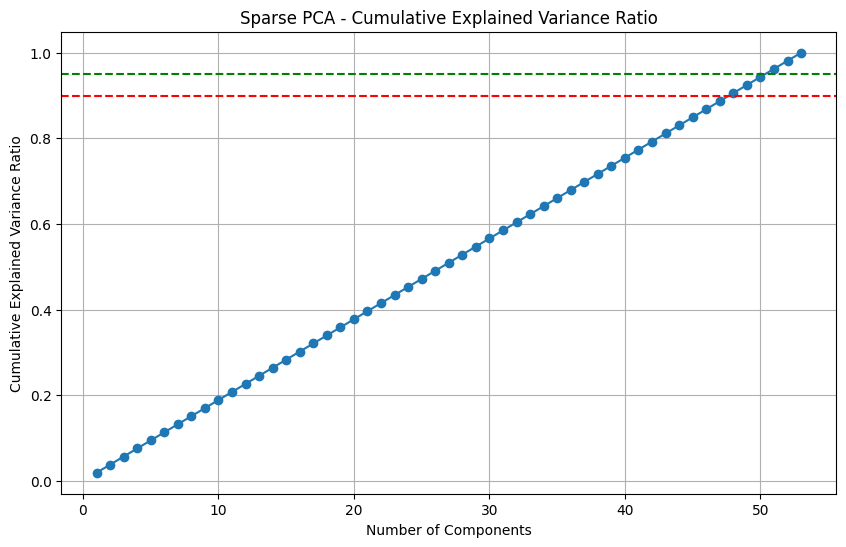

In [10]:
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
import numpy as np

# 設定最大主成分數量（例如 53）
max_components = 53
sparse_pca = SparsePCA(n_components=max_components, random_state=42, alpha=1, ridge_alpha=0.01)

# 擬合並轉換資料
sparse_pca.fit(data_scaled)
data_sparse_pca = sparse_pca.transform(data_scaled)

# 獲取每個主成分的解釋變異量（SparsePCA 不直接提供）
# 我們可以使用投影後的數據來近似計算
explained_variance = np.var(data_sparse_pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# 繪製解釋變異量比例圖
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Sparse PCA - Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [11]:
# 計算累積解釋變異量比例
cumulative_variance = np.cumsum(explained_variance_ratio)

# 設定解釋變異量的閾值（例如 90%）
threshold = 0.90

# 找到第一個累積解釋變異量超過閾值的位置
k = np.argmax(cumulative_variance >= threshold) + 1
print(f'選擇的主成分數量 k: {k}')
print(f'累積解釋變異量比例: {cumulative_variance[k-1]:.2f}')

選擇的主成分數量 k: 48
累積解釋變異量比例: 0.91


In [12]:
# 提取前 k 個主成分的特徵權重
sparse_components = sparse_pca.components_[:k]

# 將權重矩陣轉為 DataFrame，便於查看和解釋
sparse_components_df = pd.DataFrame(sparse_components, columns=data_features.columns)

# 查看前 k 個主成分的稀疏特徵
print(sparse_components_df)


    Stewed  Prune  Dried  Mixed  Apple  Banana  Berry  Cherry  Grapefruit  \
0      0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0         0.0   
1      0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0         0.0   
2      0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0         0.0   
3      0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0         0.0   
4      0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0         0.0   
5      0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0         0.0   
6      0.0    0.0    0.0    0.0    0.0     0.0    0.0     1.0         0.0   
7      0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0         0.0   
8      0.0    1.0    0.0    0.0    0.0     0.0    0.0     0.0         0.0   
9      0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0         0.0   
10     0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0         0.0   
11     0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0         0.0   

In [13]:
# 篩選並解釋每個主成分的重要特徵
for i in range(k):
    component = sparse_components_df.iloc[i]
    # 按權重絕對值排序
    important_features = component[component != 0].sort_values(ascending=False, key=abs)
    print(f"主成分 {i+1} 的重要特徵:")
    print(important_features)
    print("\n")


主成分 1 的重要特徵:
Freshtomato    1.0
Name: 0, dtype: float64


主成分 2 的重要特徵:
Broccoli    1.0
Name: 1, dtype: float64


主成分 3 的重要特徵:
Mushroom    1.0
Name: 2, dtype: float64


主成分 4 的重要特徵:
Melon    1.0
Name: 3, dtype: float64


主成分 5 的重要特徵:
Orange    1.0
Name: 4, dtype: float64


主成分 6 的重要特徵:
Mixedvegetable    1.0
Name: 5, dtype: float64


主成分 7 的重要特徵:
Cherry    1.0
Name: 6, dtype: float64


主成分 8 的重要特徵:
Plum    1.0
Name: 7, dtype: float64


主成分 9 的重要特徵:
Prune    1.0
Name: 8, dtype: float64


主成分 10 的重要特徵:
Pulses    1.0
Name: 9, dtype: float64


主成分 11 的重要特徵:
Turnip_swede    1.0
Name: 10, dtype: float64


主成分 12 的重要特徵:
Satsuma    1.0
Name: 11, dtype: float64


主成分 13 的重要特徵:
Greenbean    1.0
Name: 12, dtype: float64


主成分 14 的重要特徵:
Spinach    1.0
Name: 13, dtype: float64


主成分 15 的重要特徵:
Bakedbean    1.0
Name: 14, dtype: float64


主成分 16 的重要特徵:
Grapefruit    1.0
Name: 15, dtype: float64


主成分 17 的重要特徵:
Vegetablepieces    1.0
Name: 16, dtype: float64


主成分 18 的重要特徵:
Butternutsquash    1.0
Name: 1

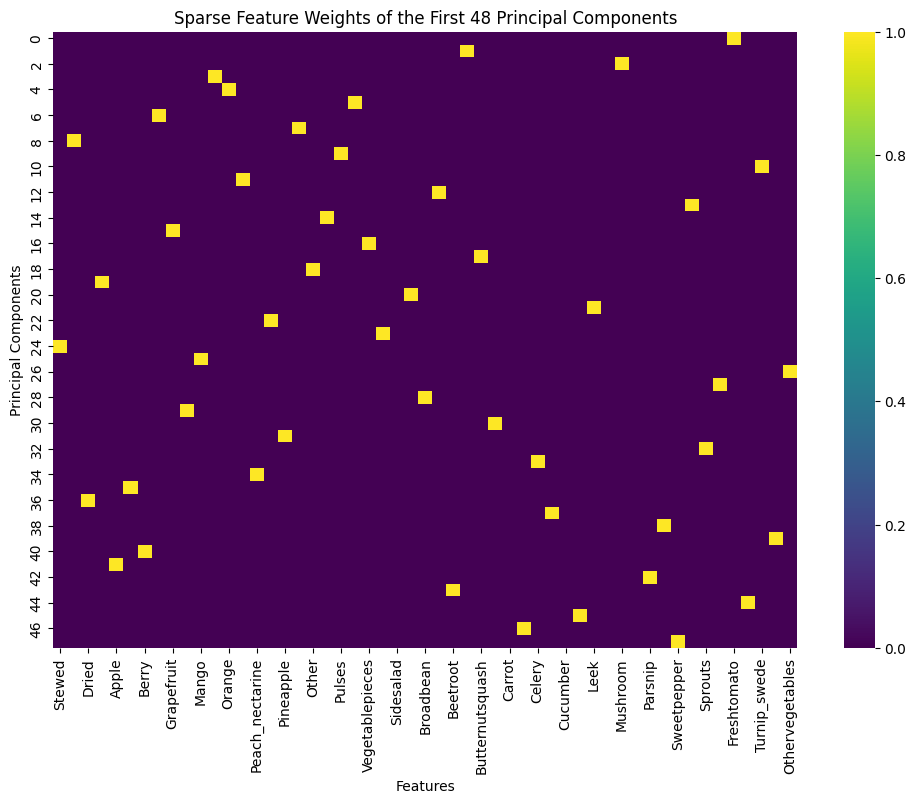

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 繪製熱圖，展示主成分的特徵權重
plt.figure(figsize=(12, 8))
sns.heatmap(sparse_components_df.iloc[:k], cmap="viridis", annot=False, fmt=".2f")
plt.title(f"Sparse Feature Weights of the First {k} Principal Components")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()


In [8]:
# 檢視前幾個主成分的稀疏性
for i in range(10):
    component = sparse_pca.components_[i]
    non_zero = np.sum(component != 0)
    total = len(component)
    contributing_features = data_features.columns[component != 0]
    print(f'主成分 {i+1}: 非零係數數量 = {non_zero}/{total}')
    print(f'貢獻變數: {list(contributing_features)}\n')

主成分 1: 非零係數數量 = 1/53
貢獻變數: ['Freshtomato']

主成分 2: 非零係數數量 = 1/53
貢獻變數: ['Broccoli']

主成分 3: 非零係數數量 = 1/53
貢獻變數: ['Mushroom']

主成分 4: 非零係數數量 = 1/53
貢獻變數: ['Melon']

主成分 5: 非零係數數量 = 1/53
貢獻變數: ['Orange']

主成分 6: 非零係數數量 = 1/53
貢獻變數: ['Mixedvegetable']

主成分 7: 非零係數數量 = 1/53
貢獻變數: ['Cherry']

主成分 8: 非零係數數量 = 1/53
貢獻變數: ['Plum']

主成分 9: 非零係數數量 = 1/53
貢獻變數: ['Prune']

主成分 10: 非零係數數量 = 1/53
貢獻變數: ['Pulses']



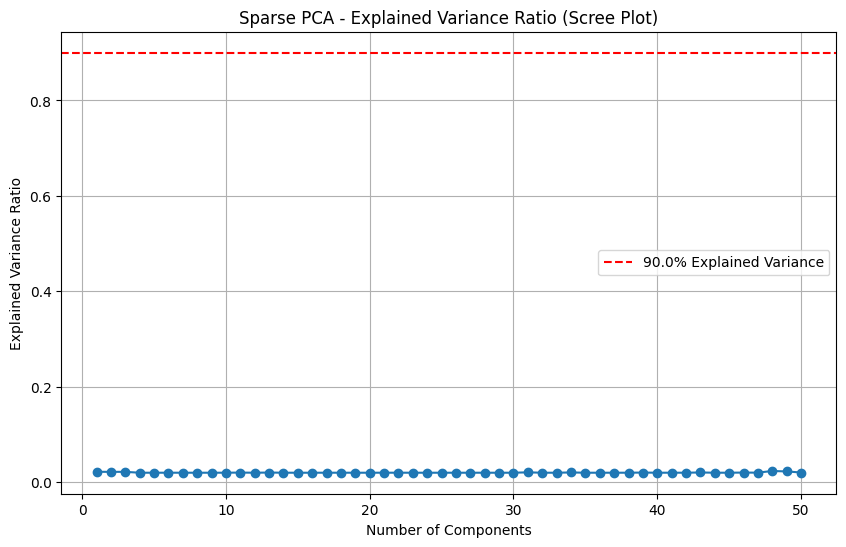

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Sparse PCA - Explained Variance Ratio (Scree Plot)')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}% Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

Alpha: 0.5, 選擇的主成分數量 k: 48, 累積解釋變異量: 0.91
Alpha: 1, 選擇的主成分數量 k: 48, 累積解釋變異量: 0.91
Alpha: 2, 選擇的主成分數量 k: 48, 累積解釋變異量: 0.91
Alpha: 3, 選擇的主成分數量 k: 48, 累積解釋變異量: 0.91
Alpha: 4, 選擇的主成分數量 k: 48, 累積解釋變異量: 0.91


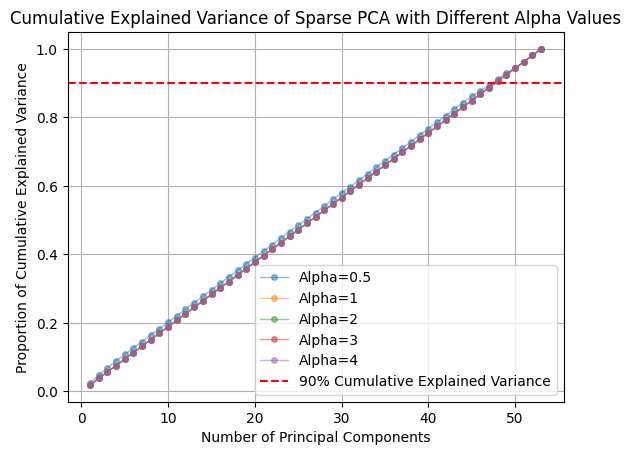

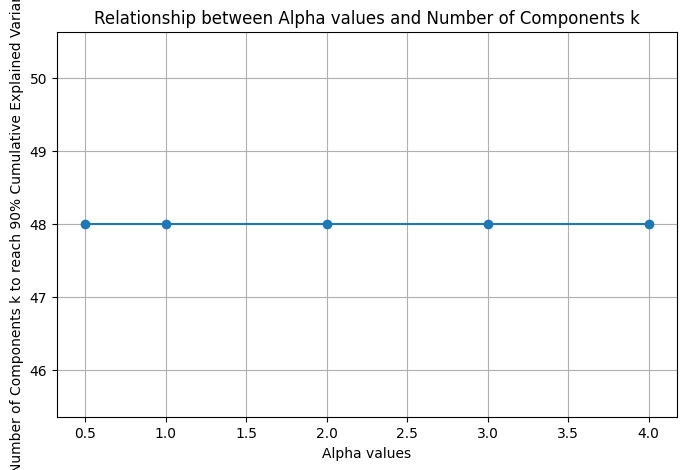

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
data = pd.read_csv('diet_data_cleaned.csv')

# 移除 'ID' 欄位（如有）
data_features = data.drop(columns=['ID'])

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# 設定最大主成分數量
max_components = 53  # 原始變數數量
threshold = 0.90      # 90% 累積解釋變異量

# 設定不同的 alpha 值進行實驗
alpha_values = [0.5, 1, 2, 3, 4]
results = {}

for alpha in alpha_values:
    # 初始化 Sparse PCA
    sparse_pca = SparsePCA(n_components=max_components, random_state=42, alpha=alpha, ridge_alpha=0.01)
    
    # 擬合並轉換資料
    data_sparse_pca = sparse_pca.fit_transform(data_scaled)
    
    # 計算解釋變異量比例
    explained_variance = np.var(data_sparse_pca, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    # 找到達到 90% 的 k 值
    k = np.argmax(cumulative_variance >= threshold) + 1
    results[alpha] = k
    
    print(f'Alpha: {alpha}, 選擇的主成分數量 k: {k}, 累積解釋變異量: {cumulative_variance[k-1]:.2f}')
    
    # 繪製每個 alpha 的累積解釋變異量
    plt.plot(range(1, max_components + 1), cumulative_variance, marker='o', label=f'Alpha={alpha}', alpha=0.5, linewidth=1, markersize=4)

# Plot the 90% threshold line
plt.axhline(y=threshold, color='r', linestyle='--', label='90% Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Cumulative Explained Variance')
plt.title('Cumulative Explained Variance of Sparse PCA with Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()

# 繪製 alpha 與 k 值的關係
alphas = list(results.keys())
ks = list(results.values())

plt.figure(figsize=(8, 5))
plt.plot(alphas, ks, marker='o', )
plt.xlabel('Alpha values')
plt.ylabel('Number of Components k to reach 90% Cumulative Explained Variance')
plt.title('Relationship between Alpha values and Number of Components k')
plt.grid(True)
plt.show()

max_components=49, 選擇的主成分數量 k: 45, 累積解釋變異量: 0.91
max_components=50, 選擇的主成分數量 k: 46, 累積解釋變異量: 0.91
max_components=51, 選擇的主成分數量 k: 47, 累積解釋變異量: 0.92
max_components=52, 選擇的主成分數量 k: 47, 累積解釋變異量: 0.90
max_components=53, 選擇的主成分數量 k: 48, 累積解釋變異量: 0.91


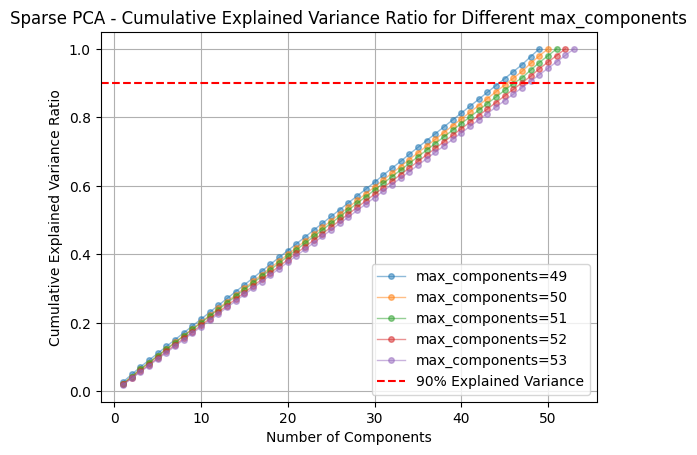

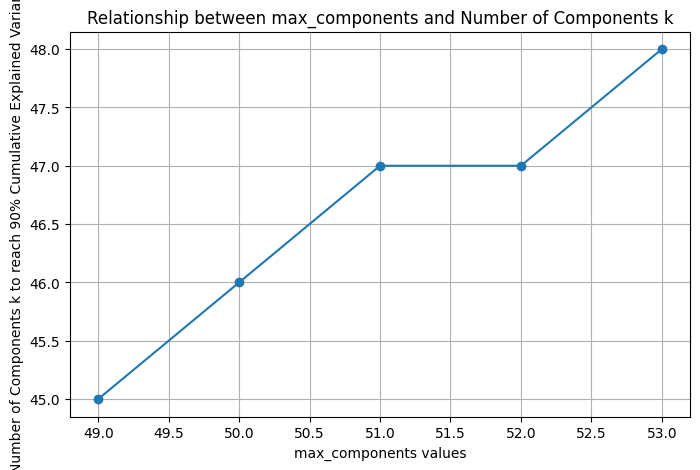

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
import numpy as np

# 讀取資料
data = pd.read_csv('diet_data_cleaned.csv')

# 移除 'ID' 欄位（如有）
data_features = data.drop(columns=['ID'])

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# 設定不同的 max_components 值
max_components_values = [49, 50, 51, 52, 53]  # 包含原始變數數量
alpha = 1
ridge_alpha = 0.01
threshold = 0.90

results = {}

for max_components in max_components_values:
    # 初始化 Sparse PCA
    sparse_pca = SparsePCA(n_components=max_components, random_state=42, alpha=alpha, ridge_alpha=ridge_alpha)
    
    # 擬合並轉換資料
    data_sparse_pca = sparse_pca.fit_transform(data_scaled)
    
    # 計算解釋變異量比例
    explained_variance = np.var(data_sparse_pca, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    # 找到達到 90% 的 k 值
    if np.any(cumulative_variance >= threshold):
        k = np.argmax(cumulative_variance >= threshold) + 1
    else:
        k = max_components  # 如果未達到閾值，設定 k 為 max_components
    results[max_components] = k
    
    print(f'max_components={max_components}, 選擇的主成分數量 k: {k}, 累積解釋變異量: {cumulative_variance[k-1]:.2f}')
    
    # 繪製累積解釋變異量
    plt.plot(range(1, max_components + 1), cumulative_variance, marker='o', label=f'max_components={max_components}', alpha=0.5, linewidth=1, markersize=4)

# 繪製 90% 閾值線
plt.axhline(y=threshold, color='r', linestyle='--', label='90% Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Sparse PCA - Cumulative Explained Variance Ratio for Different max_components')
plt.legend()
plt.grid(True)
plt.show()

# 繪製 max_components 與 k 的關係
plt.figure(figsize=(8, 5))
plt.plot(max_components_values, [results[m] for m in max_components_values], marker='o')
plt.xlabel('max_components values')
plt.ylabel('Number of Components k to reach 90% Cumulative Explained Variance')
plt.title('Relationship between max_components and Number of Components k')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 使用 Sparse PCA 的前 k 個主成分
data_sparse_pca_selected = data_sparse_pca[:, :k]

# 設定可能的 k 值範圍（例如 2 到 20）
k_values = range(2, 21)
sse = []  # 紀錄每個 k 的 SSE
silhouette_scores = []  # 紀錄每個 k 的輪廓係數

# 嘗試不同的 k 值
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_sparse_pca_selected)
    sse.append(kmeans.inertia_)
    
    # 計算輪廓係數
    silhouette_avg = silhouette_score(data_sparse_pca_selected, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# 繪製肘部法則圖（SSE）
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# 繪製輪廓係數圖
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()
